In [2]:
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
import torch
import numpy as np

# Load the pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('pdelobelle/robbert-v2-dutch-base',max_length=512, truncation=True)
model = AutoModel.from_pretrained('pdelobelle/robbert-v2-dutch-base')

# Example list of texts
texts = ["Tesla heeft vandaag een koers winst gemaakt van 5%",
         "Amazon groeide vandaag met 2%",
         "Tim cook ging vanadaag praten met Joe bidon",
         "Apple moest veel personeel ontslaan"]

# Tokenize and generate embeddings for each text
embeddings = []
for text in texts:
    tokens = tokenizer.encode(text, add_special_tokens=True)
    inputs = torch.tensor([tokens])
    outputs = model(inputs)[0]
    embedding = torch.mean(outputs, dim=1).squeeze().detach().numpy()
    embeddings.append(embedding)

# Perform clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embeddings)

# Print the clustering results
for text, cluster in zip(texts, clusters):
    print(f"Text: {text}\tCluster: {cluster}")


Some weights of RobertaModel were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\bartw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text: Tesla heeft vandaag een koers winst gemaakt van 5%	Cluster: 1
Text: Amazon groeide vandaag met 2%	Cluster: 1
Text: Tim cook ging vanadaag praten met Joe bidon	Cluster: 0
Text: Apple moest veel personeel ontlaan	Cluster: 2


No sentence-transformers model found with name C:\Users\bartw/.cache\torch\sentence_transformers\pdelobelle_robbert-v2-dutch-base. Creating a new one with MEAN pooling.
Some weights of RobertaModel were not initialized from the model checkpoint at C:\Users\bartw/.cache\torch\sentence_transformers\pdelobelle_robbert-v2-dutch-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.0597192   0.33046588 -0.01758899 ... -0.13344742  0.10359953
   0.08198784]
 [ 0.20989399  0.05427349  0.13109131 ... -0.51191044  0.1272582
  -0.03535091]
 [ 0.24329136  0.504799   -0.12289411 ...  0.071785   -0.19214565
   0.11181787]
 ...
 [-0.12545195 -0.28594217  0.2187779  ... -0.5588724  -0.26899844
  -0.35791832]
 [-0.58649087 -0.12710711 -0.12930855 ... -0.4172697   0.24327089
  -0.30779436]
 [-0.27948985 -0.45445693 -0.03499838 ... -0.32913458 -0.38556114
  -0.39342228]]


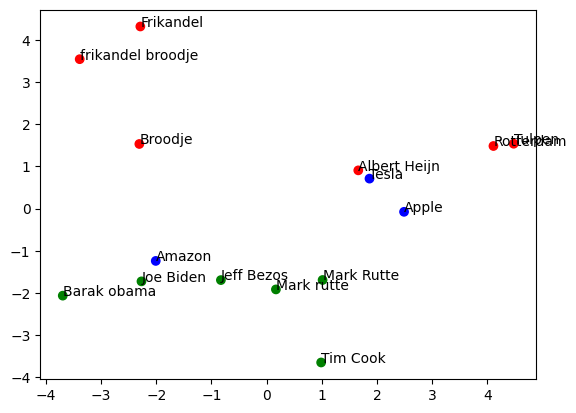

In [18]:
from sentence_transformers import SentenceTransformer
import numpy as np
np.random.seed(42)
sentences = ["Frikandel", "Broodje", "frikandel broodje", "Tesla", "Apple", "Amazon",
             "Tim Cook", "Joe Biden", "Barak obama", "Mark rutte", "Mark Rutte", "Jeff Bezos",
             "Albert Heijn", "Tulpen", "Rotterdam"]

model = SentenceTransformer('pdelobelle/robbert-v2-dutch-base')
embeddings = model.encode(sentences)
print(embeddings)

# plot embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(embeddings)
X = pca.transform(embeddings)
# make frikandel broodje and frikandel the same color
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red']
plt.scatter(X[:, 0], X[:, 1], c=colors)
for i, txt in enumerate(sentences):
    plt.annotate(txt, (X[i, 0], X[i, 1]))
